In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from cpcv import CombPurgedKFoldCVLocal

In [2]:
def generate_time_series(start, end, num_series):
    date_range = pd.date_range(start=start, end=end)
    data = np.random.rand(len(date_range), num_series)
    df = pd.DataFrame(data, index=date_range)
    df.columns = [f'feature_{i}' for i in range(len(df.columns))]
    df.index.name = 'date'
    return df

In [3]:
start_date = datetime(2020, 1, 1)
end_date = datetime(2020, 12, 31)
num_series = 10

In [4]:
df = generate_time_series(start_date, end_date, num_series)

In [5]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
date,,,,,,,,,,
2020-01-01,0.454751,0.105741,0.730634,0.654568,0.909921,0.082977,0.869187,0.704900,0.322834,0.896703
2020-01-02,0.037507,0.163067,0.021827,0.100581,0.571831,0.426528,0.966923,0.535103,0.750345,0.893582
2020-01-03,0.402151,0.746424,0.048630,0.599810,0.885763,0.505708,0.723186,0.771258,0.113620,0.353953
2020-01-04,0.969437,0.258946,0.459235,0.741512,0.989748,0.818683,0.190525,0.744335,0.874683,0.615594
2020-01-05,0.050371,0.845781,0.213191,0.272810,0.944240,0.598976,0.524707,0.676021,0.260878,0.420470


In [6]:
X, y = df.drop(columns=['feature_0']), df['feature_0']
print(f'{X.shape}, {y.shape}')

(366, 9), (366,)


In [10]:
pred_times = pd.Series(df.index, index=df.index)
eval_times = pd.Series(df.index, index=df.index)

In [11]:
cpcv = CombPurgedKFoldCVLocal(
    n_splits=10,
    n_test_splits=1,
    embargo_td=pd.Timedelta(days=2)
)

In [12]:
for i, (train_idx, test_idx) in enumerate(cpcv.split(X, y, pred_times, eval_times)):
    print(f'(Fold {i}): train rows - ({train_idx[0]}:{train_idx[-1]}); test rows - ({test_idx[0]}:{test_idx[-1]})')

(Fold 0): train rows - (0:329); test rows - (330:365)
(Fold 1): train rows - (0:365); test rows - (294:329)
(Fold 2): train rows - (0:365); test rows - (258:293)
(Fold 3): train rows - (0:365); test rows - (222:257)
(Fold 4): train rows - (0:365); test rows - (185:221)
(Fold 5): train rows - (0:365); test rows - (148:184)
(Fold 6): train rows - (0:365); test rows - (111:147)
(Fold 7): train rows - (0:365); test rows - (74:110)
(Fold 8): train rows - (0:365); test rows - (37:73)
(Fold 9): train rows - (39:365); test rows - (0:36)


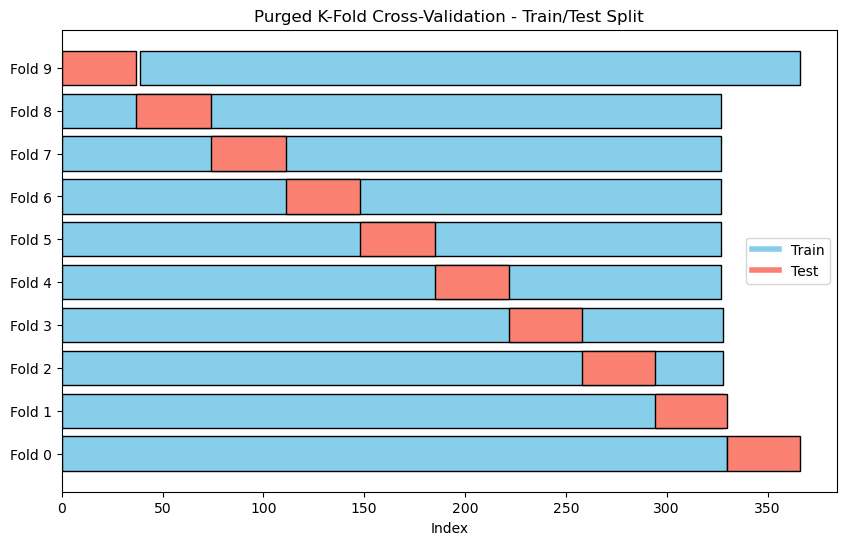

In [13]:
import matplotlib.pyplot as plt
# Cross-validation split indices
folds = list(cpcv.split(X, y, pred_times, eval_times))

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 6))

# Colors for train and test indices
train_color = 'skyblue'
test_color = 'salmon'

# Iterate over each fold
for i, (train_idx, test_idx) in enumerate(folds):
    # Create an array of zeros for this fold
    fold_data = np.zeros(len(X), dtype=int)
    
    # Mark training indices with 1
    fold_data[train_idx] = 1
    
    # Mark testing indices with 2
    fold_data[test_idx] = 2
    
    # Plot the fold as a stacked bar
    ax.barh(i, len(train_idx), left=min(train_idx), color=train_color, edgecolor='black')
    ax.barh(i, len(test_idx), left=min(test_idx), color=test_color, edgecolor='black')

# Set labels and title
ax.set_yticks(np.arange(len(folds)))
ax.set_yticklabels([f'Fold {i}' for i in range(len(folds))])
ax.set_xlabel('Index')
ax.set_title('Purged K-Fold Cross-Validation - Train/Test Split')

# Create legend
train_patch = plt.Line2D([0], [0], color=train_color, lw=4, label='Train')
test_patch = plt.Line2D([0], [0], color=test_color, lw=4, label='Test')
ax.legend(handles=[train_patch, test_patch])

# Show plot
plt.show()